<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Feature Engineering
</font>
</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing_no_outlier = pd.read_csv('../input/housing-no-outlier/housing_no_outlier.csv', encoding='gbk')
housing_no_outlier

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285035,116.546899,39.755236,2016-06-09,1.0,355.5,134.20,3,2,1,2,9,2009,hardcover,steel-concrete composite,0.500,has elevator,no subway,3
285036,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,5,2003,other,steel-concrete composite,0.333,no elevator,no subway,3
285037,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,24,2009,other,steel-concrete composite,0.222,has elevator,has subway,3
285038,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,7,2000,Simplicity,steel-concrete composite,0.500,has elevator,no subway,3


<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
φ is latitude
<br>
λ is longitude
<br>
Distance = acos(sinφ1*sinφ2 + cosφ1*cosφ2 * cos(λ2-λ1)) * 6371.0088
</font>
</p>


In [2]:
from math import radians
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)
def cd(x):
    return (np.arccos((np.sin(capital_Lat)*np.sin(radians(x.Lat))+np.cos(capital_Lat)*np.cos(radians(x.Lat))*np.cos(radians(x.Lng) - capital_Lng))))*6371.0088
housing_capital = housing_no_outlier.copy()
housing_capital['distanceToCapital'] =housing_capital.apply(cd ,axis=1)
housing_capital


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285035,116.546899,39.755236,2016-06-09,1.0,355.5,134.20,3,2,1,2,9,2009,hardcover,steel-concrete composite,0.500,has elevator,no subway,3,20.402633
285036,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,5,2003,other,steel-concrete composite,0.333,no elevator,no subway,3,20.402633
285037,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,24,2009,other,steel-concrete composite,0.222,has elevator,has subway,3,12.983181
285038,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,7,2000,Simplicity,steel-concrete composite,0.500,has elevator,no subway,3,13.519291


In [3]:
housing_PPS = housing_capital.copy()
def complex_function1(x):
      return ((x.totalPrice)/(x.square))*1000
housing_PPS['pricePerSquare'] = housing_PPS.apply(complex_function1 ,axis=1)
housing_PPS

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285035,116.546899,39.755236,2016-06-09,1.0,355.5,134.20,3,2,1,2,9,2009,hardcover,steel-concrete composite,0.500,has elevator,no subway,3,20.402633,2649.031297
285036,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,5,2003,other,steel-concrete composite,0.333,no elevator,no subway,3,20.402633,2057.976127
285037,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,24,2009,other,steel-concrete composite,0.222,has elevator,has subway,3,12.983181,3100.598461
285038,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,7,2000,Simplicity,steel-concrete composite,0.500,has elevator,no subway,3,13.519291,3513.751590


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


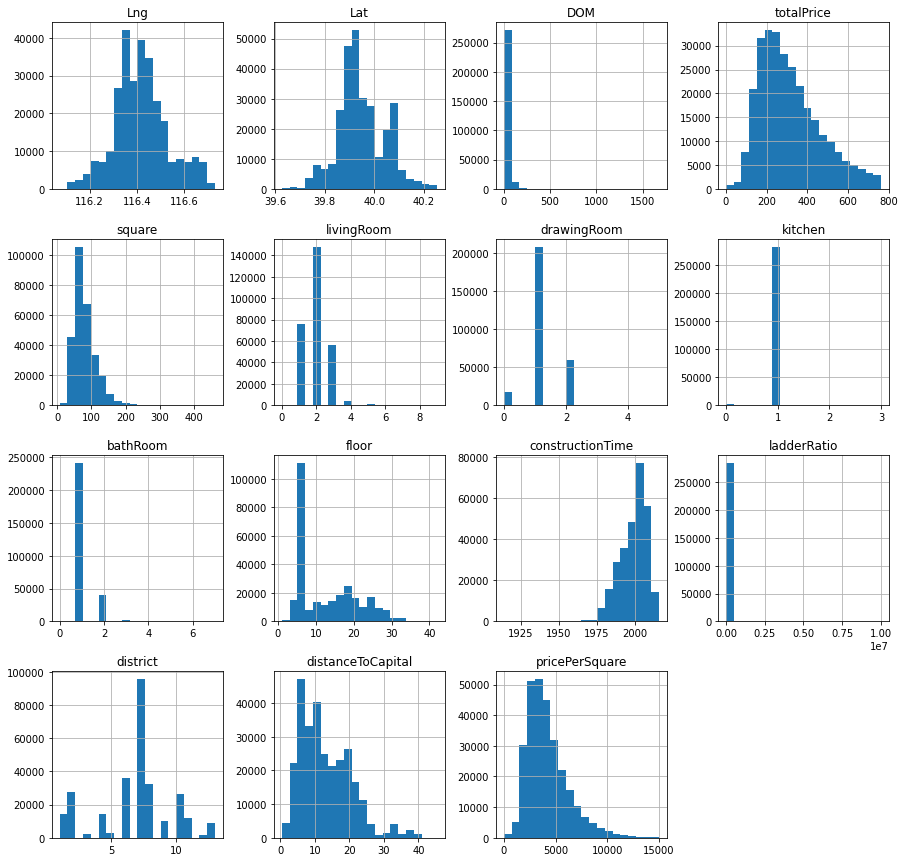

In [4]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بررسی تاثیر فاصله از مرکز بر روی قیمت‌ هر متر مربع</font>
</h2>


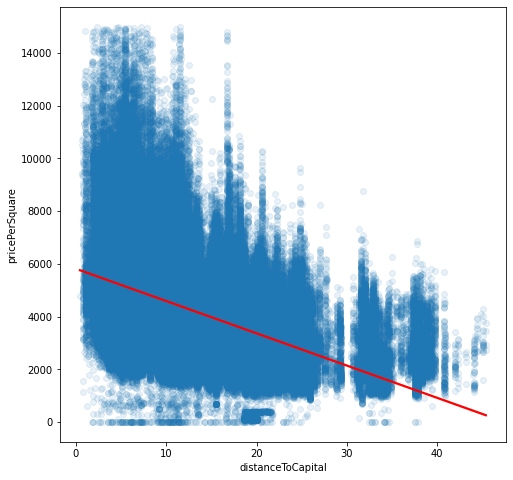

In [5]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

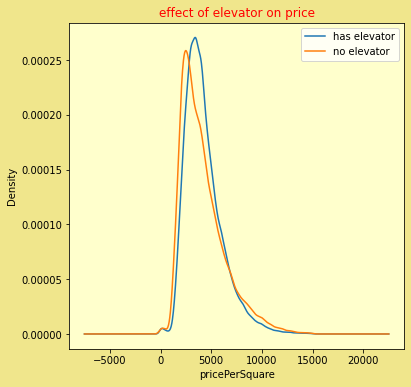

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
df1=housing_PPS[housing_PPS.elevator=='no elevator']
df=housing_PPS[housing_PPS.elevator=='has elevator']

df.pricePerSquare.plot(kind = 'kde', ax = ax ,label='has elevator' )
ax.legend()
df1.pricePerSquare.plot(kind = 'kde', ax = ax ,label='no elevator' )
ax.legend()
ax.set_title('effect of elevator on price' ,color='red')
ax.set_facecolor("#ffffcc")
ax.set_xlabel('pricePerSquare')
fig.set_facecolor('khaki');

In [7]:
housing_PPS.to_csv('housing_extended.csv', encoding='gbk', index=False)